streamlit is used for creating web applications.  
pandas is used for data manipulation and analysis.  
numpy is used for numerical operations.  
pd.read_csv('data.csv') loads the data from a CSV file.

In [41]:
import streamlit as st
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv("data/U.S._Chronic_Disease_Indicators_data.csv")

# Display basic info about the dataset
print(data.head())
print(data.info())
print(data.describe())

C:\Users\Jason\AppData\Local\Temp\ipykernel_13328\4130013802.py:6: DtypeWarning: Columns (7,10,18,19,20,21,23,30,31,32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data/U.S._Chronic_Disease_Indicators_data.csv")


   YearStart  YearEnd LocationAbbr LocationDesc DataSource    Topic  \
0       2015     2015           AK       Alaska      YRBSS  Alcohol   
1       2015     2015           AL      Alabama      YRBSS  Alcohol   
2       2015     2015           AR     Arkansas      YRBSS  Alcohol   
3       2015     2015           AZ      Arizona      YRBSS  Alcohol   
4       2015     2015           CA   California      YRBSS  Alcohol   

                  Question Response DataValueUnit     DataValueType  ...  \
0  Alcohol use among youth      NaN             %  Crude Prevalence  ...   
1  Alcohol use among youth      NaN             %  Crude Prevalence  ...   
2  Alcohol use among youth      NaN             %  Crude Prevalence  ...   
3  Alcohol use among youth      NaN             %  Crude Prevalence  ...   
4  Alcohol use among youth      NaN             %  Crude Prevalence  ...   

  LocationID  TopicID QuestionID DataValueTypeID  StratificationCategoryID1  \
0          2      ALC     ALC1_1     

In [3]:
# Check for missing values
print(data.isnull().sum())

# Display data types
print(data.dtypes)


YearStart                         0
YearEnd                           0
LocationAbbr                      0
LocationDesc                      0
DataSource                        0
Topic                             0
Question                          0
Response                     324661
DataValueUnit                 29865
DataValueType                     0
DataValue                    106167
DataValueAlt                 130318
DataValueFootnoteSymbol      215965
DatavalueFootnote            216131
LowConfidenceLimit           157165
HighConfidenceLimit          157165
StratificationCategory1           0
Stratification1                   0
StratificationCategory2      324661
Stratification2              324661
StratificationCategory3      324661
Stratification3              324661
GeoLocation                    2568
ResponseID                   324661
LocationID                        0
TopicID                           0
QuestionID                        0
DataValueTypeID             

In [4]:
# Check the size of the dataset
print(f"Number of rows: {data.shape[0]}")
print(f"Number of columns: {data.shape[1]}")

# Check memory usage
print("\nMemory Usage:")
print(data.memory_usage(deep=True))
print(f"\nTotal memory usage: {data.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


Number of rows: 403984
Number of columns: 34

Memory Usage:
Index                             132
YearStart                     3231872
YearEnd                       3231872
LocationAbbr                 20603184
LocationDesc                 23325505
DataSource                   22042458
Topic                        27155304
Question                     48231020
Response                     14355302
DataValueUnit                20822749
DataValueType                26560505
DataValue                    17482828
DataValueAlt                  3231872
DataValueFootnoteSymbol      16555441
DatavalueFootnote            28214313
LowConfidenceLimit            3231872
HighConfidenceLimit           3231872
StratificationCategory1      24255287
Stratification1              25292725
StratificationCategory2      14355302
Stratification2              14355302
StratificationCategory3      14355302
Stratification3              14355302
GeoLocation                  35233794
ResponseID                  

In [6]:
print(data.columns.tolist())

['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource', 'Topic', 'Question', 'Response', 'DataValueUnit', 'DataValueType', 'DataValue', 'DataValueAlt', 'DataValueFootnoteSymbol', 'DatavalueFootnote', 'LowConfidenceLimit', 'HighConfidenceLimit', 'StratificationCategory1', 'Stratification1', 'StratificationCategory2', 'Stratification2', 'StratificationCategory3', 'Stratification3', 'GeoLocation', 'ResponseID', 'LocationID', 'TopicID', 'QuestionID', 'DataValueTypeID', 'StratificationCategoryID1', 'StratificationID1', 'StratificationCategoryID2', 'StratificationID2', 'StratificationCategoryID3', 'StratificationID3']


In [12]:
# Filter for alcohol-related data
alcohol_data = data[data['Topic'] == 'Alcohol']

# Drop rows with missing DataValue
alcohol_data = alcohol_data.dropna(subset=['DataValue'])

# Convert DataValue to numeric
alcohol_data['DataValue'] = pd.to_numeric(alcohol_data['DataValue'], errors='coerce')

# Aggregate data by Location and Year
aggregated_data = alcohol_data.groupby(['YearStart', 'LocationDesc'], as_index=False).agg({
    'DataValue': 'mean',
    'LowConfidenceLimit': 'mean',
    'HighConfidenceLimit': 'mean'
})

# Rename columns for clarity
aggregated_data.columns = ['Year', 'Location', 'MeanAlcoholUse', 'MeanLowConfidence', 'MeanHighConfidence']

print(aggregated_data.head())


   Year    Location  MeanAlcoholUse  MeanLowConfidence  MeanHighConfidence
0  2010     Alabama      100.343750             8.5800              10.980
1  2010      Alaska       20.593750             8.0800              16.840
2  2010     Arizona      150.163158            19.1250              24.675
3  2010    Arkansas       67.200000             8.3900              11.650
4  2010  California      522.592000            11.5125              14.500


In [13]:
# Select top 10 locations with the highest mean alcohol use
top_locations = aggregated_data.groupby('Location').MeanAlcoholUse.mean().nlargest(10).index

# Filter for these locations
filtered_data = aggregated_data[aggregated_data['Location'].isin(top_locations)]

print(filtered_data)


     Year        Location  MeanAlcoholUse  MeanLowConfidence  \
4    2010      California      522.592000          11.512500   
9    2010         Florida      396.573684          10.000000   
13   2010        Illinois      157.795455           6.771429   
22   2010        Michigan      184.378947           9.600000   
32   2010        New York      198.590909           5.771429   
33   2010  North Carolina      178.881250           8.350000   
35   2010            Ohio      202.384211           8.858333   
38   2010    Pennsylvania      193.852632           7.050000   
43   2010           Texas      397.722727           9.564286   
44   2010   United States     7981.250000           9.750000   
56   2011      California      158.173913           8.783333   
61   2011         Florida      106.915190           8.211111   
66   2011        Illinois       59.132857           9.546875   
75   2011        Michigan       57.706757           9.877941   
85   2011        New York       65.12375

In [8]:
# Filter for alcohol-related data
alcohol_data = data[data['Topic'] == 'Alcohol']

# Handle missing values in DataValue
alcohol_data = alcohol_data.dropna(subset=['DataValue'])

# Select relevant columns
clean_data = alcohol_data[['YearStart', 'LocationDesc', 'DataValue', 'LowConfidenceLimit', 'HighConfidenceLimit']]

# Rename columns for clarity
clean_data.columns = ['Year', 'Location', 'AlcoholUsePercentage', 'LowConfidenceLimit', 'HighConfidenceLimit']

# Display cleaned dataset
print("Cleaned Dataset:")
print(clean_data.head())

Cleaned Dataset:
   Year    Location AlcoholUsePercentage  LowConfidenceLimit  \
0  2015      Alaska                 22.0                19.7   
1  2015     Alabama                 30.7                27.3   
2  2015    Arkansas                 27.6                24.5   
3  2015     Arizona                 34.8                29.7   
4  2015  California                 28.9                23.6   

   HighConfidenceLimit  
0                 24.5  
1                 34.3  
2                 30.8  
3                 40.2  
4                 34.7  


In [9]:
# Basic statistics of the cleaned dataset
print("\nBasic Statistics:")
print(clean_data.describe())

# Check for any remaining missing values
print("\nRemaining Missing Values:")
print(clean_data.isnull().sum())



Basic Statistics:
               Year  LowConfidenceLimit  HighConfidenceLimit
count  20129.000000        16087.000000         16087.000000
mean    2012.686969            8.533139            12.454286
std        1.493338            6.186318             9.479032
min     2010.000000            1.000000             2.700000
25%     2011.000000            4.300000             6.300000
50%     2013.000000            6.800000             8.900000
75%     2014.000000           10.900000            16.600000
max     2015.000000           87.600000           151.400000

Remaining Missing Values:
Year                       0
Location                   0
AlcoholUsePercentage       0
LowConfidenceLimit      4042
HighConfidenceLimit     4042
dtype: int64


>Data Preprocessing    
data.dropna(inplace=True) removes any rows with missing values.

In [18]:
# Filter for alcohol-related data
alcohol_data = data[data['Topic'] == 'Alcohol']

# Drop rows with missing DataValue
alcohol_data = alcohol_data.dropna(subset=['DataValue'])

# Convert DataValue to numeric for analysis
alcohol_data['DataValue'] = pd.to_numeric(alcohol_data['DataValue'], errors='coerce')

print(alcohol_data.head())


   YearStart  YearEnd LocationAbbr LocationDesc DataSource    Topic  \
0       2015     2015           AK       Alaska      YRBSS  Alcohol   
1       2015     2015           AL      Alabama      YRBSS  Alcohol   
2       2015     2015           AR     Arkansas      YRBSS  Alcohol   
3       2015     2015           AZ      Arizona      YRBSS  Alcohol   
4       2015     2015           CA   California      YRBSS  Alcohol   

                  Question Response DataValueUnit     DataValueType  ...  \
0  Alcohol use among youth      NaN             %  Crude Prevalence  ...   
1  Alcohol use among youth      NaN             %  Crude Prevalence  ...   
2  Alcohol use among youth      NaN             %  Crude Prevalence  ...   
3  Alcohol use among youth      NaN             %  Crude Prevalence  ...   
4  Alcohol use among youth      NaN             %  Crude Prevalence  ...   

   LocationID  TopicID QuestionID DataValueTypeID  StratificationCategoryID1  \
0           2      ALC     ALC1_1   

In [19]:
# Aggregate data by year and location
aggregated_data = alcohol_data.groupby(['YearStart', 'LocationDesc'], as_index=False).agg({
    'DataValue': 'mean',
    'LowConfidenceLimit': 'mean',
    'HighConfidenceLimit': 'mean'
})

# Rename columns for clarity
aggregated_data.columns = ['Year', 'Location', 'MeanAlcoholUse', 'MeanLowConfidence', 'MeanHighConfidence']

print(aggregated_data.head())


   Year    Location  MeanAlcoholUse  MeanLowConfidence  MeanHighConfidence
0  2010     Alabama      100.343750             8.5800              10.980
1  2010      Alaska       20.593750             8.0800              16.840
2  2010     Arizona      150.163158            19.1250              24.675
3  2010    Arkansas       67.200000             8.3900              11.650
4  2010  California      522.592000            11.5125              14.500


In [20]:
print(aggregated_data.isnull().sum())


Year                  0
Location              0
MeanAlcoholUse        0
MeanLowConfidence     0
MeanHighConfidence    0
dtype: int64


In [33]:
# Convert DataValue to numeric, replacing non-numeric values with NaN
alcohol_data['DataValue'] = pd.to_numeric(alcohol_data['DataValue'], errors='coerce')

# Drop rows with NaN values in DataValue
alcohol_data = alcohol_data.dropna(subset=['DataValue'])

# Verify that DataValue is numeric
print(alcohol_data['DataValue'].dtype)  # Should print 'float64'


float64


Top 10 Locations with Highest Alcohol Use:
Location
United States     2140.152272
California         199.903204
Texas              156.623780
Florida            141.747817
Ohio                81.300674
New York            78.344760
Pennsylvania        74.255415
Michigan            70.237274
Illinois            68.868594
North Carolina      66.388624
Name: MeanAlcoholUse, dtype: float64


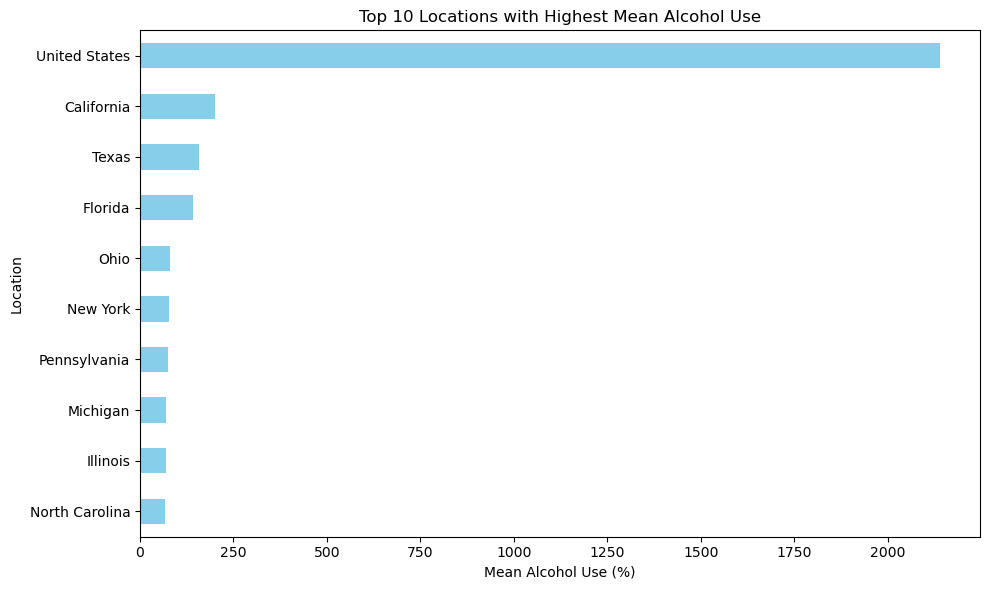

In [34]:
# Top 10 locations with highest mean alcohol use
top_locations = aggregated_data.groupby('Location').MeanAlcoholUse.mean().nlargest(10)

print("Top 10 Locations with Highest Alcohol Use:")
print(top_locations)

# Bar plot for top locations
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
top_locations.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 10 Locations with Highest Mean Alcohol Use')
plt.xlabel('Mean Alcohol Use (%)')
plt.ylabel('Location')
plt.tight_layout()
plt.show()


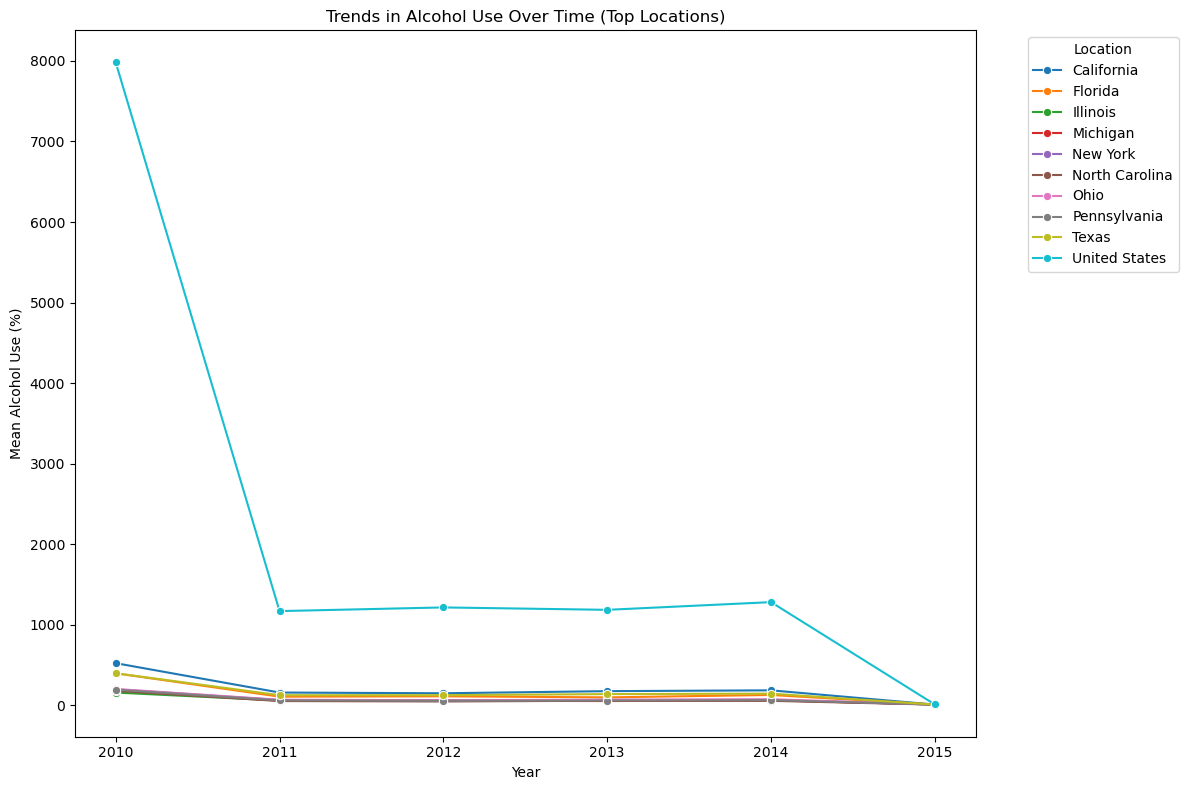

In [22]:
import seaborn as sns

# Filter for top locations only
filtered_data = aggregated_data[aggregated_data['Location'].isin(top_locations.index)]

# Line plot of trends over time
plt.figure(figsize=(12, 8))
sns.lineplot(data=filtered_data, x='Year', y='MeanAlcoholUse', hue='Location', marker='o')
plt.title('Trends in Alcohol Use Over Time (Top Locations)')
plt.xlabel('Year')
plt.ylabel('Mean Alcohol Use (%)')
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


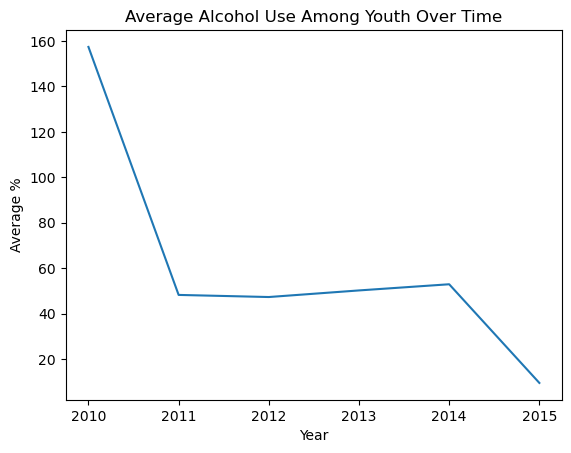

In [24]:
import matplotlib.pyplot as plt

# Group by year and calculate average DataValue
yearly_trends = alcohol_data.groupby('YearStart')['DataValue'].mean()

# Plot trends over time
plt.plot(yearly_trends.index, yearly_trends.values)
plt.title('Average Alcohol Use Among Youth Over Time')
plt.xlabel('Year')
plt.ylabel('Average %')
plt.show()


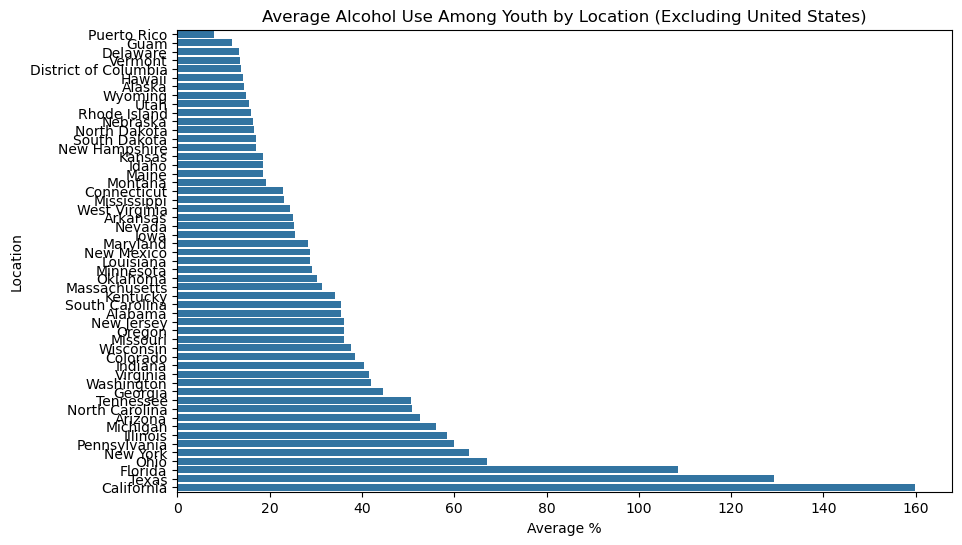

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming alcohol_data is already loaded
# Remove "United States" from the data
filtered_data = alcohol_data[alcohol_data['LocationDesc'] != 'United States']

# Bar plot of average DataValue by LocationDesc
location_means = filtered_data.groupby('LocationDesc')['DataValue'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=location_means.values, y=location_means.index)
plt.title('Average Alcohol Use Among Youth by Location (Excluding United States)')
plt.xlabel('Average %')
plt.ylabel('Location')
plt.show()


>Model Training

train_test_split splits the data into training and testing sets.  
LinearRegression is used to create a linear regression model.  
model.fit(X_train, y_train) trains the model on the training data.  

In [26]:
from sklearn.model_selection import train_test_split

# Convert categorical data into numerical format using one-hot encoding
X = pd.get_dummies(alcohol_data[['YearStart', 'LocationDesc']], drop_first=True)
y = alcohol_data['DataValue']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


>Model Evaluation  
model.predict(X_test) generates predictions for the test data.

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Drop rows with NaN values in y_train and y_test
X_train_clean = X_train[~y_train.isna()]
y_train_clean = y_train.dropna()
X_test_clean = X_test[~y_test.isna()]
y_test_clean = y_test.dropna()

model = RandomForestRegressor(random_state=42)
model.fit(X_train_clean, y_train_clean)

# Predict on test data
predictions = model.predict(X_test_clean)

# Evaluate model performance
mse = mean_squared_error(y_test_clean, predictions)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 445843.5204258618


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

# Assuming data is already loaded
X = data[['YearStart', 'LocationDesc']]  # Replace with your actual feature columns
y = pd.to_numeric(data['DataValue'], errors='coerce')  # Convert target column to numeric, coerce errors to NaN

# Define the preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, ['YearStart']),
        ('cat', categorical_transformer, ['LocationDesc'])
    ])

# Create a pipeline that first preprocesses the data and then fits the model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# Drop rows with NaN values in the target column
X = X[~y.isna()]
y = y.dropna()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions on the test set
predictions = pipeline.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 193000951.6233814


In [29]:
def get_recommendation(location, year):
    location_encoded = pd.get_dummies([location], drop_first=True).reindex(columns=X.columns, fill_value=0)
    year_encoded = pd.DataFrame({'YearStart': [year]}, index=[0]).reindex(columns=X.columns, fill_value=0)

    user_input = location_encoded.add(year_encoded, fill_value=0).iloc[0].values.reshape(1, -1)
    
    predicted_value = model.predict(user_input)[0]
    
    if predicted_value > 25:  # Example threshold for high risk
        return f"High risk detected! Predicted alcohol use: {predicted_value:.2f}%. Consider intervention."
    else:
        return f"Low risk detected! Predicted alcohol use: {predicted_value:.2f}%."

# Test recommendation function
print(get_recommendation('Alaska', 2015))


Low risk detected! Predicted alcohol use: 7.90%.


c:\Users\Jason\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [40]:
# Test the function with multiple locations
test_locations = ['Alaska', 'Alabama', 'California', 'Massachusetts']
for location in test_locations:
    print(f"\nRecommendation in 2015 for {location}:")
    print(get_recommendation(location, 2015))



Recommendation in 2015 for Alaska:
Low risk detected. Alcohol use among youth is 22.0%.

Recommendation in 2015 for Alabama:
High risk detected! Alcohol use among youth is 30.7%.

Recommendation in 2015 for California:
Low risk detected. Alcohol use among youth is 28.9%.

Recommendation in 2015 for Massachusetts:
High risk detected! Alcohol use among youth is 33.9%.
